#Process modelling with initial data

In [ ]:
#mengimport library yag digunakan
import pandas as pd
import numpy as np

In [ ]:
#mengimport dataset digunakan based classifica
predikat = pd.read_excel("project AI k-nn unit Bili-Bili.xlsx")
predikat

,waktu,Genshaftx,TEMPBEARINGMETAL,TEMPBEARINGMETALTURBINE,kondisi
0,comisioning,98.000000,54.2,65.0,0
1,comisioning,96.000000,54.0,64.0,0
2,2015-12-18 00:00:00,104.000000,55.2,64.0,0
3,2015-12-16 00:00:00,130.000000,58.1,64.4,1
4,2015-12-19 00:00:00,134.000000,56.5,61.9,1
5,2015-12-23 00:00:00,113.000000,60.0,65.6,1
6,2016-01-25 00:00:00,70.000000,57.2,63.0,0
7,2016-01-24 00:00:00,106.000000,54.2,62.7,0
8,31/12/2015,151.000000,56.9,65.9,1
9,2016-01-01 00:00:00,125.000000,59.9,65.8,1


In [ ]:
#membagi column yang digunakan sebagai feature=x(Genshaftx,TEMPBEARING METAL) dan y=label(kondisi)
#y=label(1=kondisi abnormal,0=kondisi normal)
x = predikat.iloc[:,1:3].values
y = predikat.iloc[:,-1].values

In [ ]:
#membagi dataset sebagai modelling 80% untuk train dan 20% test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)

In [ ]:
#menggunakan library k-nn 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#proses mengetahui berapa nilai terbaik k atau jumlah neigbour  untuk permodelan dari 1-10
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks))


for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_predict=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)

mean_acc

array([1.        , 0.85714286, 1.        , 0.85714286, 0.85714286,
       0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.71428571])

In [ ]:
#modelling dengan k-nn dengan k=terbaik dengan mengukur jarak antar plot dengan minwoski
knn =KNeighborsClassifier (n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

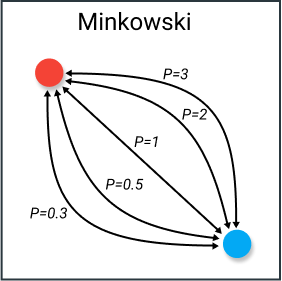

In [ ]:
#Cara  modelling  pengukuran antar plot jenis minwoski rekomendasi p=2
from PIL import Image
img=Image.open('22.png')
img

In [ ]:
#proses testing dengan modelling menggunakan dataset yang split
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
#menghitung probabilitas testing
knn.predict_proba(x_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [ ]:
#menghitung confusion matrix actual dan predict
from sklearn.metrics import classification_report,confusion_matrix
print (confusion_matrix(y_test,y_pred))

[[6 0]
 [0 7]]


In [ ]:
#hasil reporting berdasarkan y test dengan y prediksi,
#Accuracy Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data
# Precision Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.
#Recall Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13





```

```

# Predict use modelling with new data

In [ ]:
#PREDIKSI PERTAMA vibrasi Genshaftx=80,TEMPBEARINGMETAL=56
y_pred1=knn.predict([(90,56)])
print(y_pred1)
if (y_pred1> 0):
  print('abnormal')
else:
  print('normal')

[0]
normal


In [ ]:
#PREDIKSI KEDUA Genshaftx=145,TEMPBEARINGMETAL=59
y_pred2=knn.predict([(145,59)])
print(y_pred2)
if (y_pred2> 0):
  print('abnormal')
else:
  print('normal')

[1]
abnormal


#Visualization with scatterplot

In [ ]:
# mengimport library visualisasi data
import sys
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import numpy as np
%matplotlib inline

In [ ]:
#hasil prediksi  normal data baru
x3 = np.array([90])
y3 = np.array([56])


In [ ]:
#hasil prediksi abnormal data baru 
x4 = np.array([145])
y4 = np.array([59])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'camp'
  if __name__ == '__main__':
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


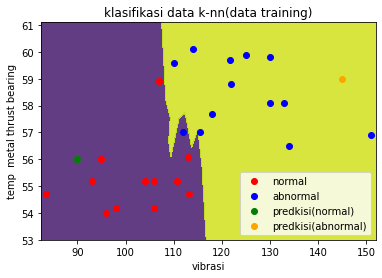

In [ ]:
#hasil visualisasi berdasarkan modelling
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                      np.arange(start=x_set[:, 1].min()-1,stop=x_set[:, 1].max()+1,step=0.01))

plt.contourf(x1,x2, knn.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                  alpha = 0.85, camp = ListedColormap(('yellow','grey')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
   plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i), label = 'normal' if j == 0 else 'abnormal') # Ternery Operator
  
plt.scatter(x3,y3, label="predkisi(normal)",color='green')

plt.scatter(x4,y4, label="predkisi(abnormal)",color='orange')
  
plt.title('klasifikasi data k-nn(data training)')
plt.xlabel('vibrasi')
plt.ylabel('temp  metal thrust bearing')
plt.legend()
plt.show()